In [1]:
import os
import numpy as np

# general run param definition
injection_volume = 0.095
steadystate_time = 19

np_dir = '/home/sam/Documents/openfoam-spray-runs/Output_numpys/total'
home_dir = os.getcwd()

# get list of all numpys
os.chdir(np_dir) 
np_sets = [".".join(f.split(".")[:-1]) for f in os.listdir() if os.path.isfile(f)]

# iterate over all np_sets, import and normalise, flatten them, catenate into one array and extract the input params from the name:
for idx, dataframe in enumerate(np_sets):
    df = np.load( (dataframe + '.npy') )
    df = df[:,:,steadystate_time] / injection_volume 
    df_f = df.flatten()
    5
    nms = dataframe.split('_')
    run_params = np.array([nms[1], nms[2], nms[3], nms[4], nms[5]], 'f')
    if idx == 0:
        inputs = run_params
        outputs_f = df.flatten()
        outputs   = df
        out_deposition = df.sum()
    else:
        inputs = np.vstack((run_params, inputs))
        outputs_f = np.vstack((outputs_f, df.flatten()))
        outputs = np.dstack((outputs, df))
        out_deposition = np.vstack((out_deposition, df.sum()))
os.chdir(home_dir)
outputs = np.swapaxes(outputs, 0, 2)
outputs = np.swapaxes(outputs, 1, 2)
print('input shape:', np.shape(inputs))
print('output shape:', np.shape(outputs))

input shape: (3763, 5)
output shape: (3763, 30, 20)


0.023953263157894734
The brute force optimal threshold is: 9.5
The computed optimal threshold is: 9.263084687263428


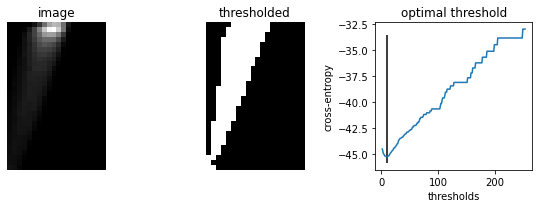

In [19]:
# let's threshold an example image
from skimage import filters
from skimage.filters.thresholding import _cross_entropy
from skimage import data
import matplotlib.pyplot as plt

img = outputs[89,:,:]
max = np.max(img)
print(max)
img = 255*img/max

thresholds = np.arange(np.min(img) + 1.5, np.max(img) - 1.5)
entropies = [_cross_entropy(img, t) for t in thresholds]

optimal_img_threshold = thresholds[np.argmin(entropies)]

fig, ax = plt.subplots(1, 3, figsize=(8, 3))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('image')
ax[0].set_axis_off()

ax[1].imshow(img > 14, cmap='gray')
ax[1].set_title('thresholded')
ax[1].set_axis_off()

ax[2].plot(thresholds, entropies)
ax[2].set_xlabel('thresholds')
ax[2].set_ylabel('cross-entropy')
ax[2].vlines(optimal_img_threshold,
             ymin=np.min(entropies) - 0.05 * np.ptp(entropies),
             ymax=np.max(entropies) - 0.05 * np.ptp(entropies))
ax[2].set_title('optimal threshold')

fig.tight_layout()

print('The brute force optimal threshold is:', optimal_img_threshold)
print('The computed optimal threshold is:', filters.threshold_li(img))

plt.show()

max value = 0.02072515789473684
Li optimal threshold is: 0.0008975486132805663


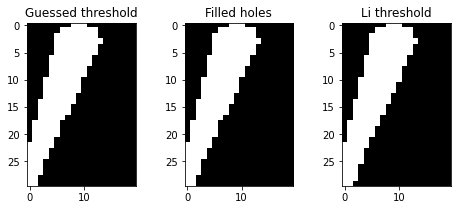

max value = 0.00382458947368421
Li optimal threshold is: 0.0002913400480123572


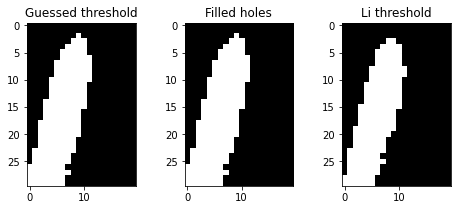

max value = 0.0013097684210526316
Li optimal threshold is: 0.00015073206657563841


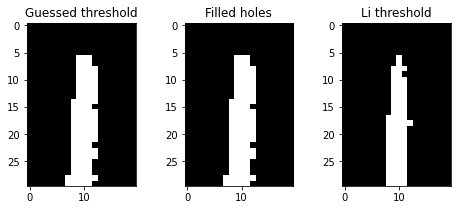

max value = 0.0007836894736842105
Li optimal threshold is: 7.234953699752735e-05


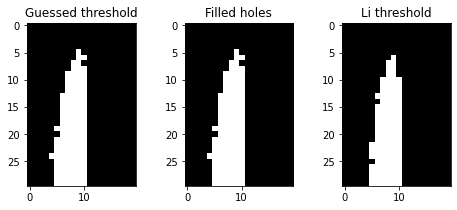

max value = 0.09480705263157894
Li optimal threshold is: 0.005944776897986157


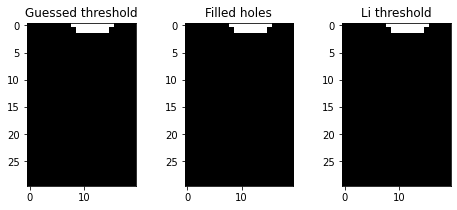

max value = 0.009812694736842107
Li optimal threshold is: 0.0006478129371418052


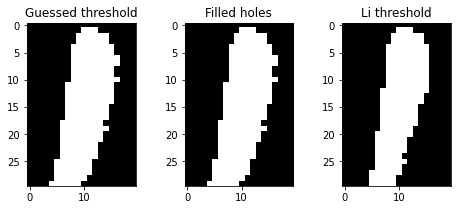

max value = 0.0030176315789473686
Li optimal threshold is: 0.0002690775420434512


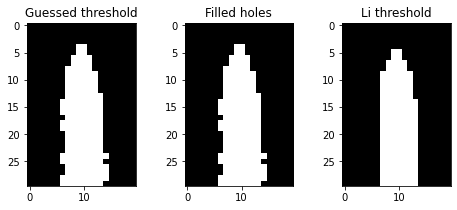

max value = 0.03392978947368421
Li optimal threshold is: 0.001868971136989614


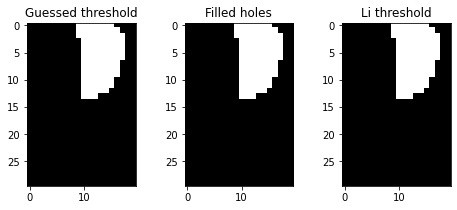

max value = 0.0037426736842105265
Li optimal threshold is: 0.00027091932793586645


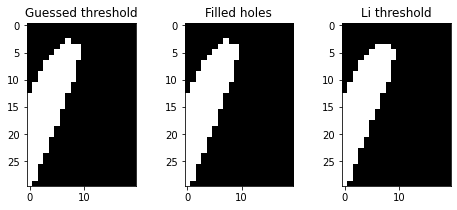

max value = 0.0030408842105263158
Li optimal threshold is: 0.0002430727501745717


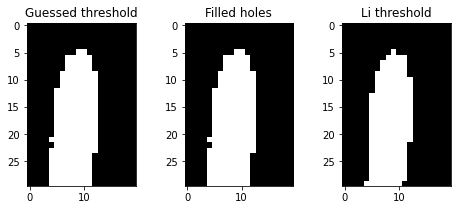

max value = 0.003970410526315789
Li optimal threshold is: 0.0003401602049503564


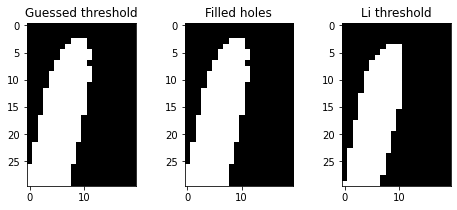

max value = 0.0033274947368421054
Li optimal threshold is: 0.00022607288896672666


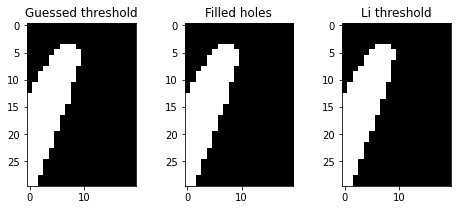

max value = 0.023204315789473684
Li optimal threshold is: 0.001190316124912619


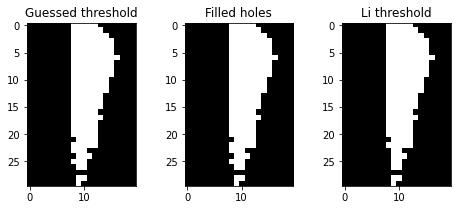

max value = 0.0033393052631578947
Li optimal threshold is: 0.00023149643349019468


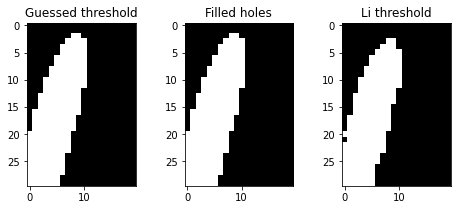

max value = 0.0029062947368421054
Li optimal threshold is: 0.0002075316638847302


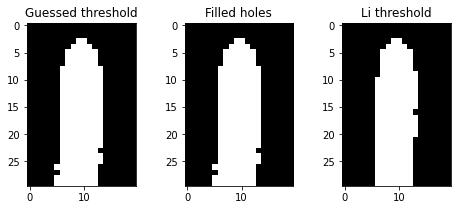

max value = 0.004526094736842106
Li optimal threshold is: 0.0003403740732986207


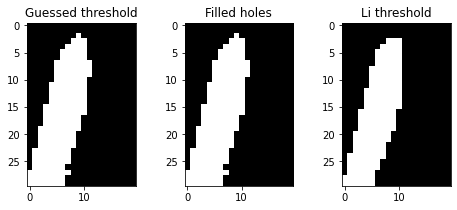

max value = 0.016245684210526315
Li optimal threshold is: 0.0009373346725145892


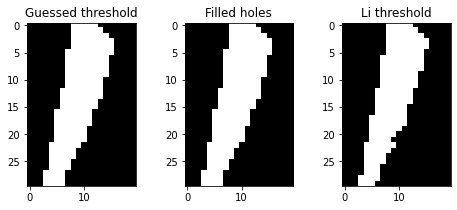

max value = 0.028935684210526315
Li optimal threshold is: 0.0012284759478337858


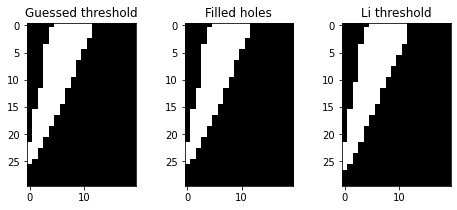

max value = 0.03159621052631579
Li optimal threshold is: 0.001247880797548389


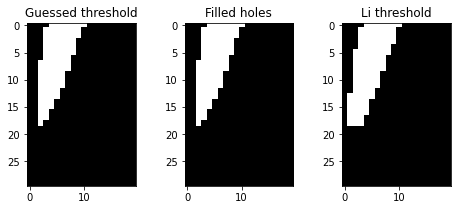

max value = 0.001982578947368421
Li optimal threshold is: 0.00017833513419102386


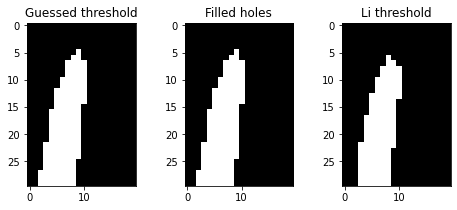

max value = 0.003081852631578947
Li optimal threshold is: 0.00026631646139683285


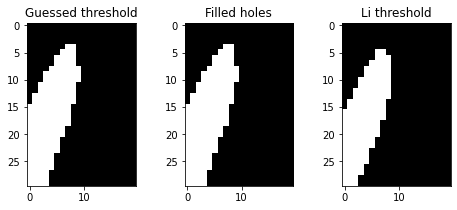

max value = 0.0006960042105263157
Li optimal threshold is: 7.339497461756254e-05


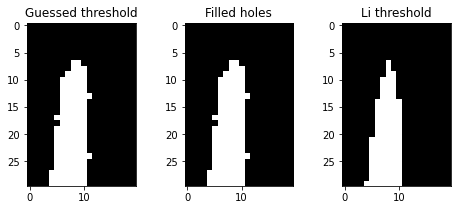

max value = 0.06501147368421054
Li optimal threshold is: 0.004235472453882969


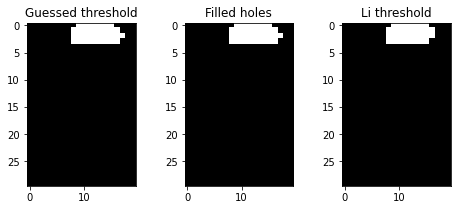

max value = 0.0012045684210526316
Li optimal threshold is: 0.00010938839373536166


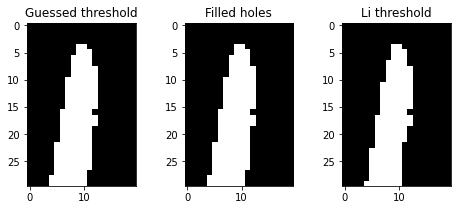

max value = 0.0006490715789473684
Li optimal threshold is: 5.797305543155809e-05


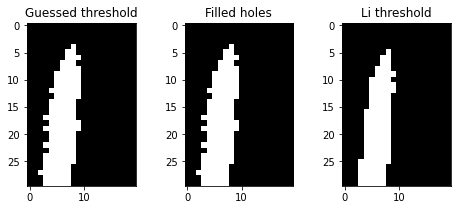

max value = 0.0034386
Li optimal threshold is: 0.00025560584840122905


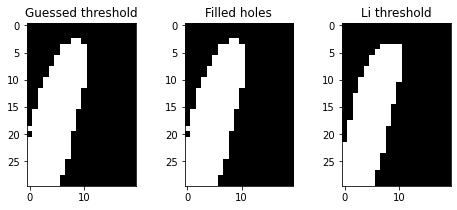

max value = 0.0022103894736842104
Li optimal threshold is: 0.00018371207848881006


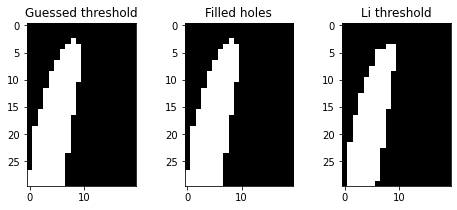

max value = 0.0019649052631578946
Li optimal threshold is: 0.00021371002247184859


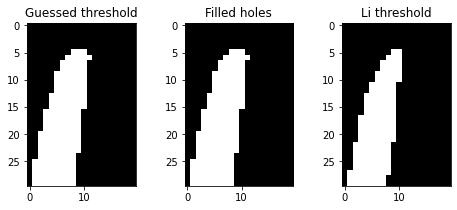

max value = 0.0006899915789473685
Li optimal threshold is: 7.492981771952794e-05


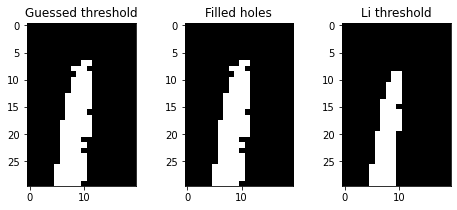

max value = 0.0
Li optimal threshold is: 0.0


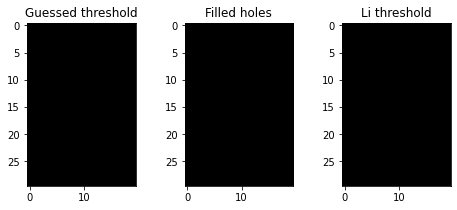

max value = 0.0329301052631579
Li optimal threshold is: 0.001466920711324036


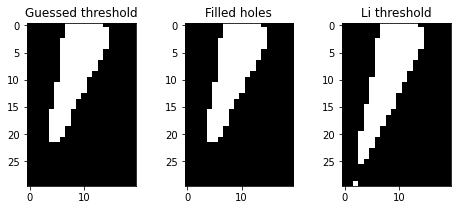

max value = 0.06433884210526315
Li optimal threshold is: 0.003554830612745272


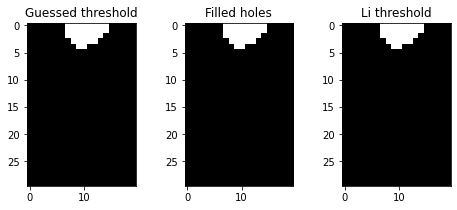

max value = 0.0077018315789473685
Li optimal threshold is: 0.0004212163978332606


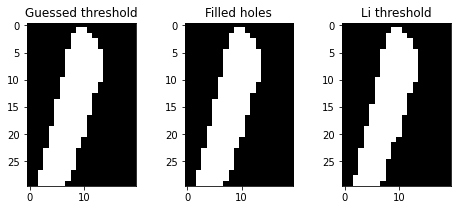

max value = 0.005590863157894737
Li optimal threshold is: 0.00034915052927297934


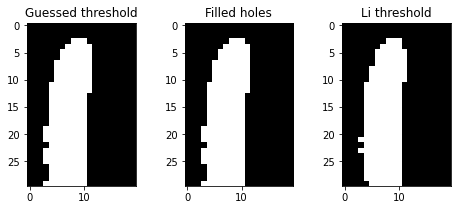

max value = 0.006152200000000001
Li optimal threshold is: 0.0003942472022641394


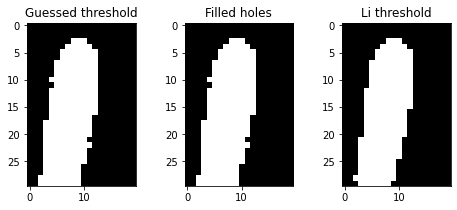

max value = 0.009426684210526316
Li optimal threshold is: 0.0007155485231516749


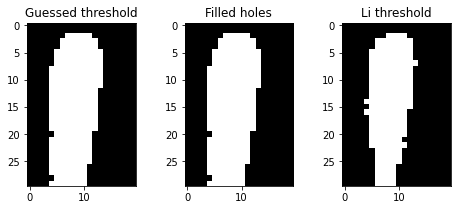

max value = 0.020070105263157893
Li optimal threshold is: 0.001345594091951354


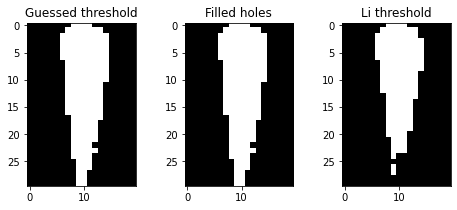

max value = 0.029456210526315786
Li optimal threshold is: 0.0015831290230340568


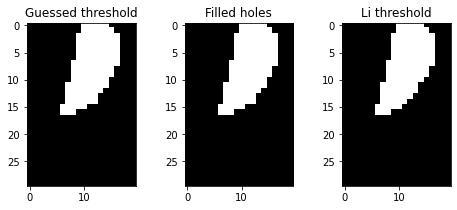

max value = 0.001128557894736842
Li optimal threshold is: 0.00010244518399140222


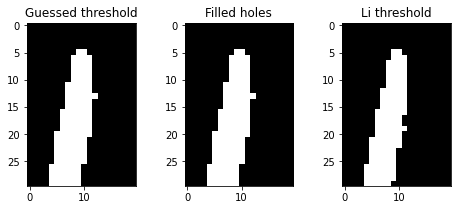

max value = 0.0028306526315789475
Li optimal threshold is: 0.00022252711906331073


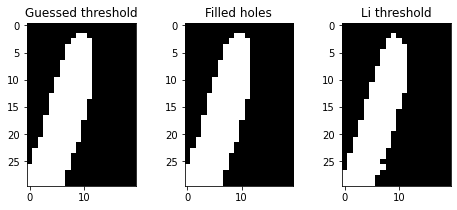

max value = 0.05914631578947368
Li optimal threshold is: 0.0029740852318445943


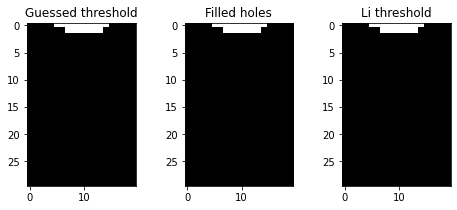

max value = 0.0646958947368421
Li optimal threshold is: 0.004209210935681986


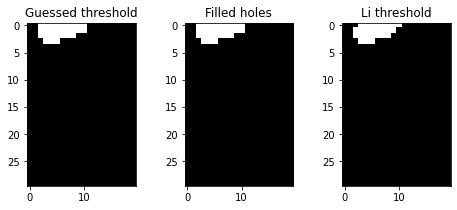

max value = 0.0011462736842105263
Li optimal threshold is: 0.00011028077555699995


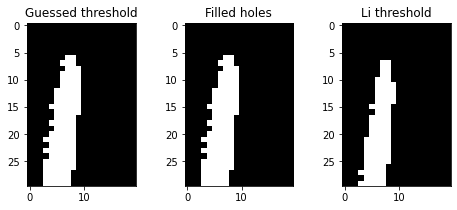

max value = 0.0013215263157894735
Li optimal threshold is: 0.00012172987933235706


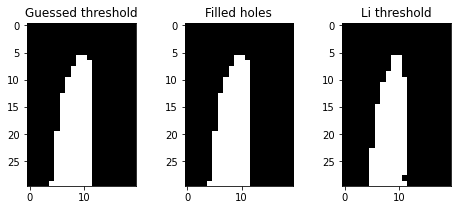

max value = 0.001110863157894737
Li optimal threshold is: 0.00010955116513027441


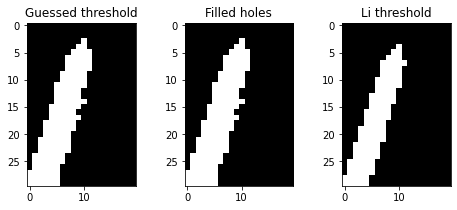

max value = 0.0012866631578947367
Li optimal threshold is: 0.0001335186020696972


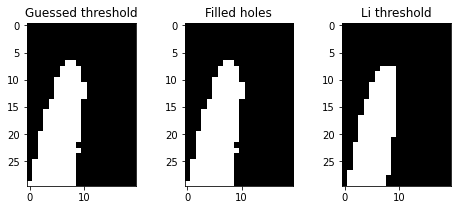

max value = 0.04620473684210526
Li optimal threshold is: 0.0026130450638363087


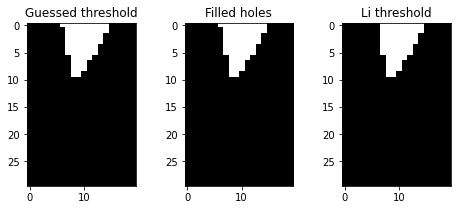

max value = 0.007795073684210526
Li optimal threshold is: 0.0004546531455091242


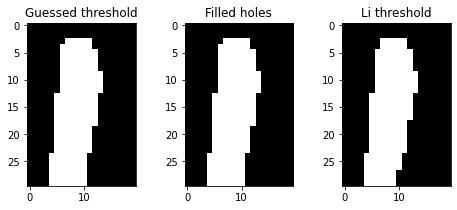

max value = 0.005661063157894736
Li optimal threshold is: 0.00030571122240810616


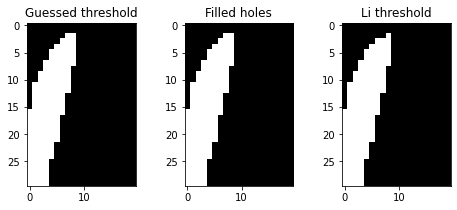

max value = 0.010198842105263159
Li optimal threshold is: 0.0005181294696043565


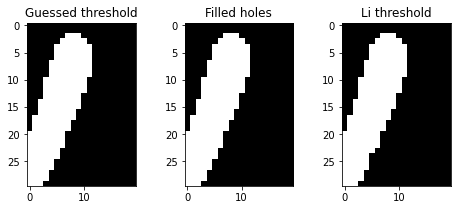

max value = 0.0013274631578947369
Li optimal threshold is: 0.00013421867018489298


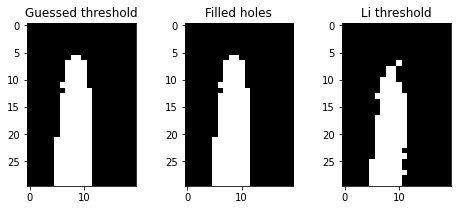

max value = 0.010666736842105262
Li optimal threshold is: 0.0005400667225263616


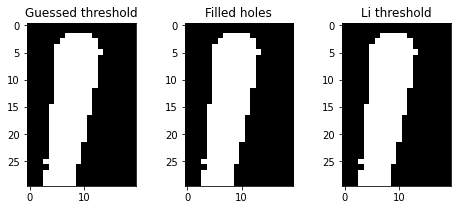

max value = 0.07458473684210526
Li optimal threshold is: 0.0043013810276898296


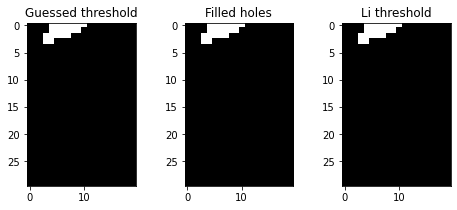

max value = 0.0011813368421052632
Li optimal threshold is: 0.00013015086680421084


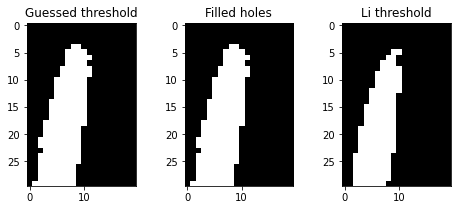

max value = 0.01254978947368421
Li optimal threshold is: 0.000550652527850654


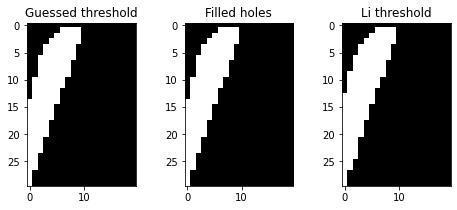

max value = 0.0009590452631578947
Li optimal threshold is: 9.532387342660801e-05


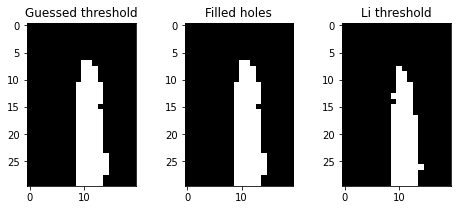

max value = 0.0025438526315789472
Li optimal threshold is: 0.000173613710306


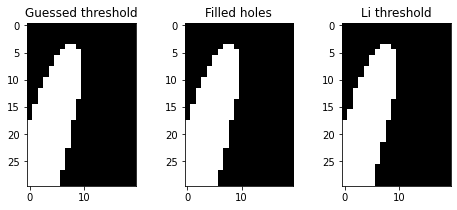

max value = 0.0014327157894736841
Li optimal threshold is: 0.0001486861429560395


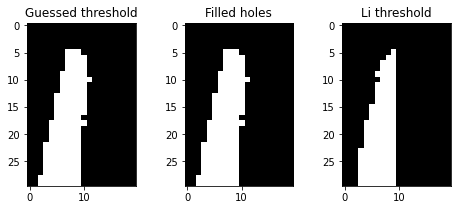

max value = 0.023128421052631576
Li optimal threshold is: 0.0014234267105143036


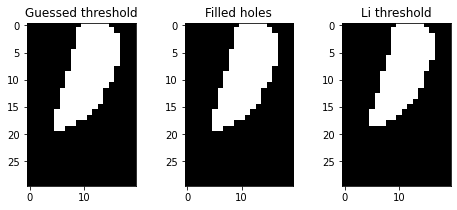

max value = 0.015778105263157895
Li optimal threshold is: 0.0006962846656856289


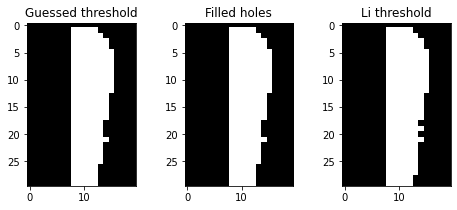

max value = 0.0034678631578947366
Li optimal threshold is: 0.00025885001292660757


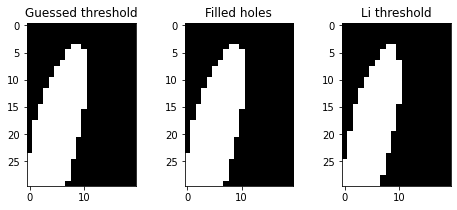

max value = 0.006549694736842105
Li optimal threshold is: 0.0004216917437941143


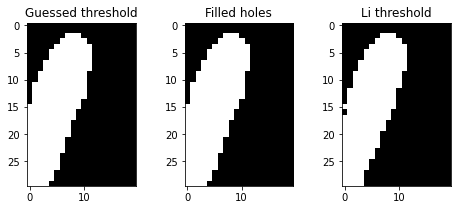

max value = 0.040316105263157896
Li optimal threshold is: 0.002044075970383905


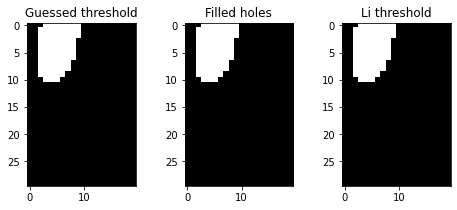

max value = 0.016602526315789474
Li optimal threshold is: 0.0007857787197899428


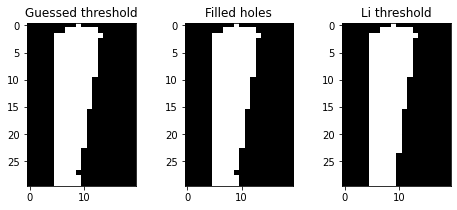

max value = 0.0
Li optimal threshold is: 0.0


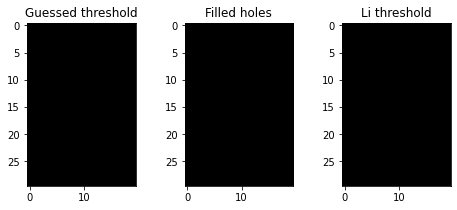

max value = 0.016280842105263156
Li optimal threshold is: 0.000598279267167052


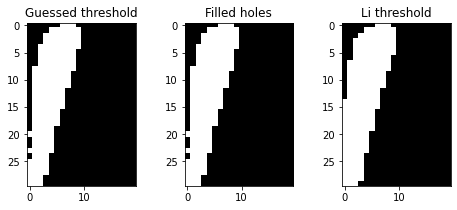

max value = 0.0026786
Li optimal threshold is: 0.00020135954382348458


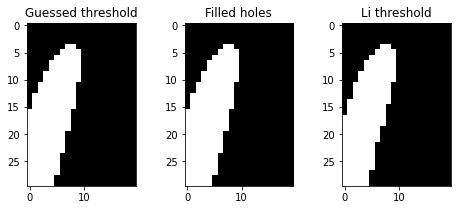

max value = 0.009818978947368422
Li optimal threshold is: 0.0005233241010725709


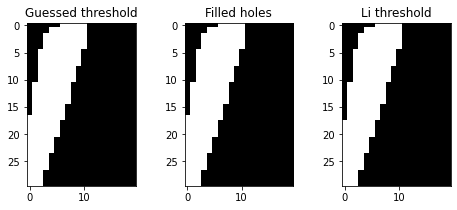

max value = 0.012970526315789476
Li optimal threshold is: 0.000627353373065116


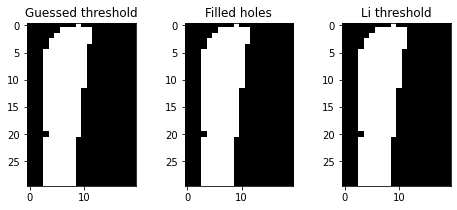

max value = 0.0006199178947368421
Li optimal threshold is: 6.528799959030578e-05


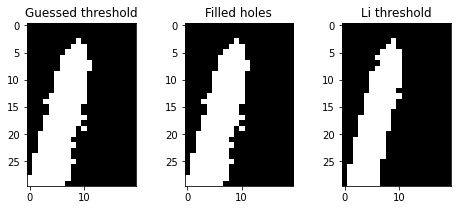

max value = 0.0005204347368421053
Li optimal threshold is: 5.0328444875584684e-05


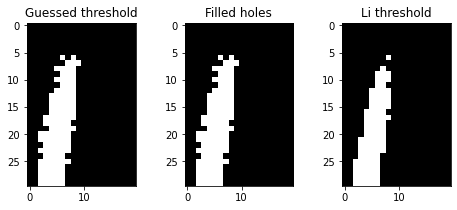

max value = 0.08861378947368422
Li optimal threshold is: 0.004380533746394286


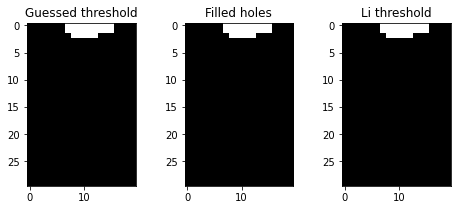

max value = 0.002204652631578947
Li optimal threshold is: 0.00019099249331551573


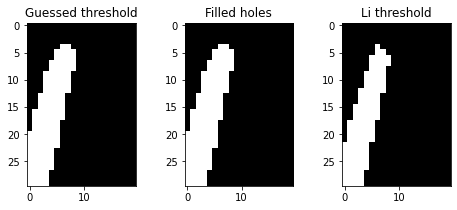

max value = 0.008479347368421054
Li optimal threshold is: 0.0004130867638430151


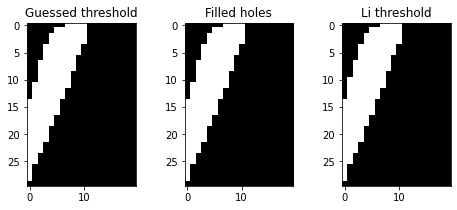

max value = 0.005520505263157895
Li optimal threshold is: 0.0003351442809601631


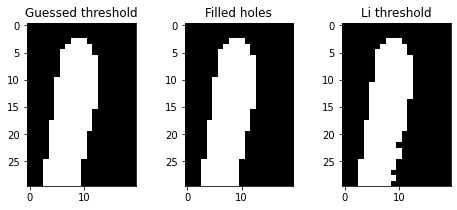

max value = 0.027474105263157897
Li optimal threshold is: 0.001305994897274927


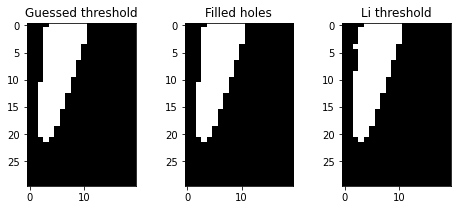

max value = 0.006345073684210526
Li optimal threshold is: 0.0003807961411111235


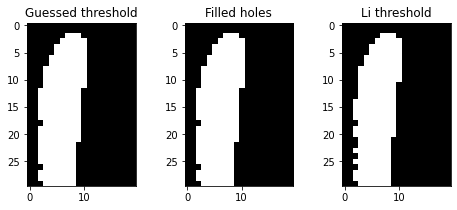

max value = 0.0031520947368421054
Li optimal threshold is: 0.00027507751250141596


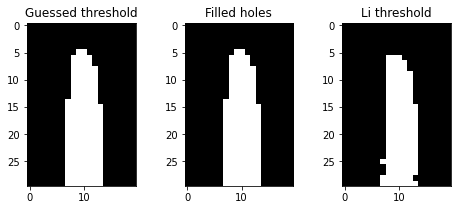

max value = 0.0004619642105263158
Li optimal threshold is: 5.237643446652373e-05


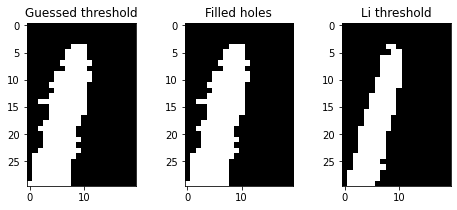

max value = 0.0010408694736842106
Li optimal threshold is: 0.00011249514225882301


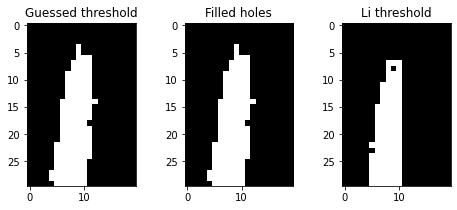

max value = 0.014158
Li optimal threshold is: 0.0007915453495100084


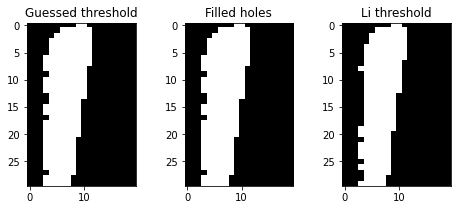

max value = 0.0009530536842105264
Li optimal threshold is: 0.00010370053715417402


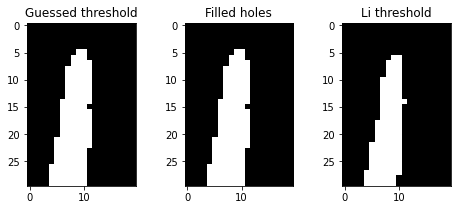

max value = 0.0007603368421052631
Li optimal threshold is: 8.033919582046683e-05


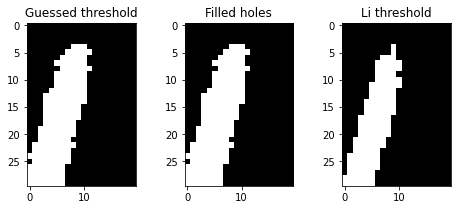

max value = 0.010918
Li optimal threshold is: 0.0005110723850972234


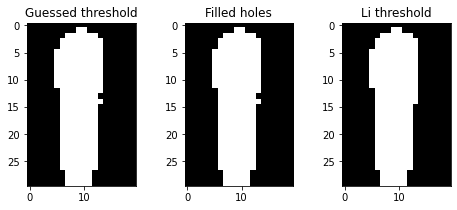

max value = 0.000543918947368421
Li optimal threshold is: 5.708744344239106e-05


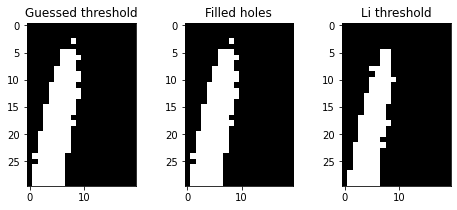

max value = 0.06747410526315789
Li optimal threshold is: 0.00464959682574789


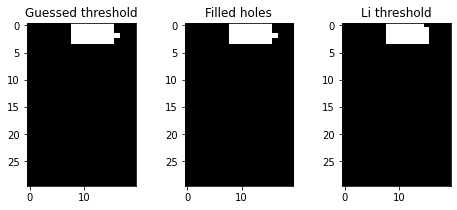

max value = 0.0010410357894736842
Li optimal threshold is: 9.56216414041441e-05


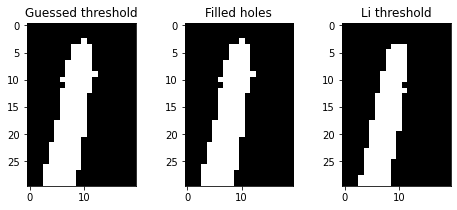

max value = 0.0
Li optimal threshold is: 0.0


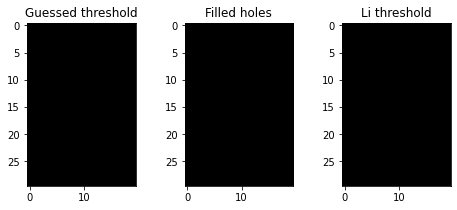

max value = 0.004467789473684211
Li optimal threshold is: 0.00030407102881640374


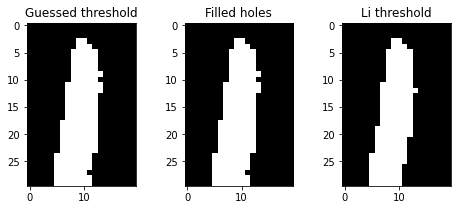

max value = 0.023953263157894734
Li optimal threshold is: 0.0008701219810505331


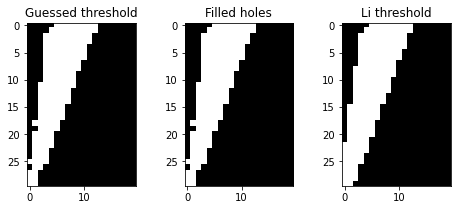

max value = 0.0026491894736842105
Li optimal threshold is: 0.00021780909993973803


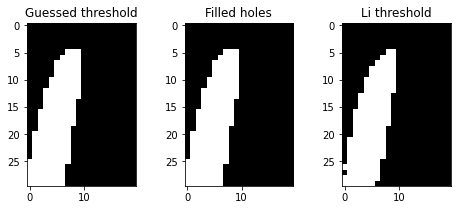

max value = 0.0007601273684210527
Li optimal threshold is: 8.964145679166159e-05


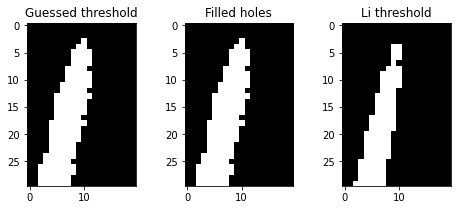

max value = 0.0
Li optimal threshold is: 0.0


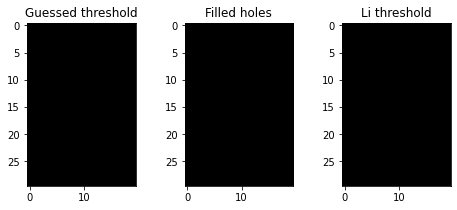

max value = 0.000549678947368421
Li optimal threshold is: 6.081553795441809e-05


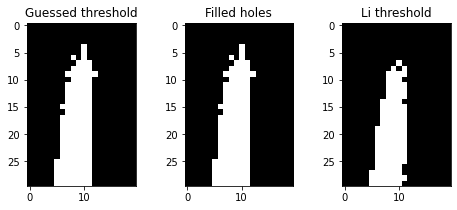

max value = 0.0013627052631578949
Li optimal threshold is: 0.00013769102087368094


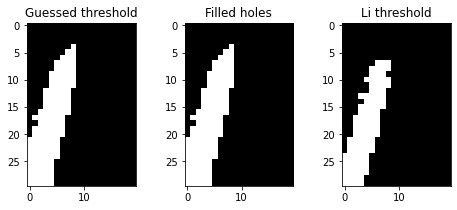

max value = 0.0019360105263157893
Li optimal threshold is: 0.0001877631069075641


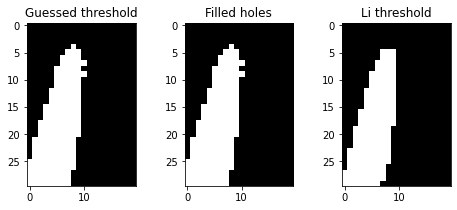

max value = 0.0017366842105263158
Li optimal threshold is: 0.00017565191859329044


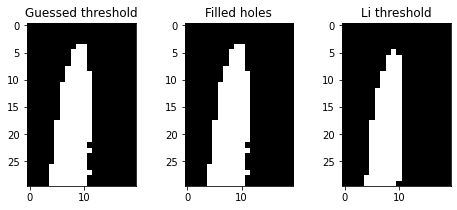

max value = 0.02219294736842105
Li optimal threshold is: 0.001126506560035546


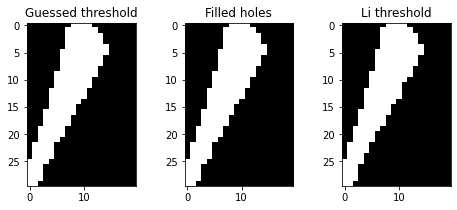

max value = 0.019058315789473684
Li optimal threshold is: 0.0008236428650469336


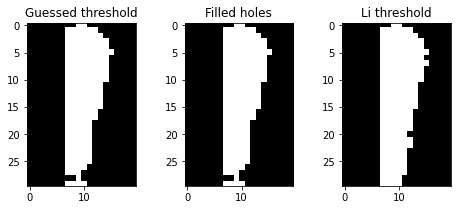

max value = 0.0010819684210526316
Li optimal threshold is: 0.00011094709433686641


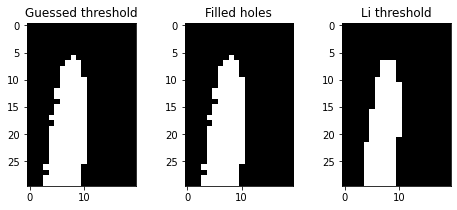

In [3]:
# let's just use a single threshold and keep scaling 0-1
from scipy import ndimage as ndi

for i in range(100):
    img = outputs[i,:,:]
    max = np.max(img)
    print("max value = " + str(max))
    print('Li optimal threshold is:', filters.threshold_li(img))
    if max > 0:
        img = img/max
    
    imgthr = img > 0.05
    imgthrfill = ndi.binary_fill_holes(imgthr).astype(bool)
    
    
    fig, ax = plt.subplots(1, 3, figsize=(8, 3))
    ax[0].imshow(imgthr, cmap='gray')
    ax[0].set_title('Guessed threshold')
    ax[1].imshow(imgthrfill, cmap = 'gray')
    ax[1].set_title('Filled holes')
    ax[2].imshow(img>filters.threshold_li(img), cmap = 'gray')
    ax[2].set_title('Li threshold')
    
    plt.show()

In [51]:
quad1 = imgthr[0:15, 0:10]
quad2 = imgthr[16:30, 0:10]
quad3 = imgthr[0:15, 11:20]
quad4 = imgthr[16:30, 11:20]

quads = np.array([np.sum(quad1), np.sum(quad2), np.sum(quad3), np.sum(quad4)])
zerolocs = np.where(quads == 0)[0]
print(zerolocs)
b = np.Nan
np.put(quads, zerolocs, b)
print(quads)

def sparse_argsort(arr):
    indices = np.nonzero(arr)[0]
    return indices[np.argsort(arr[indices])]

indices = np.zeros(quads)[0]
print(indices)

order = quads.argsort()
ranks = order.argsort()
print(order)
print(ranks)

[2 3]


AttributeError: module 'numpy' has no attribute 'Nan'

In [11]:
print(count)

[[False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False  True  True  True  True False
  False False False False False False False False]
 [False False False False False False  True  True  True  True  True  True
  False False False False False False False False]
 [False False False False False  True  True  True  True  True  True  True
   True False False False False False False False]
 [False False False False False  True  True  True  True  True  True  True
   True False False False False False False False]
 [False False False False False  True  True  True  True  True  True  True
   True False False False False False False False]
 [False False False False  True  True  True  True  True  True  True  True
   True False False False False False False False]
